# Imports e definição de constantes

In [41]:
from math import cosh, sinh, sqrt, tanh, log
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# T_Kelvin = T_Celsius + 273.15

# Parâmetros para o nosso grupo: Seção transversal retangular

L = 0.175                                   # Comprimento da aleta em m
t = 0.002                                   # Espessura da aleta em m
w = 0.024                                   # Largura da aleta em m
P = 2*t + 2*w                               # Perímetro da seção transversal em m
A = t*w                                     # Área da seção transversal em m^2
h = 20                                      # Coeficiente de convecção em W/ m^2 * K
As = (2 * L * t) + (w * t) + (2 * L * w)    # Área da superfície
Ab = (w * t)                                # Área da base

# Parâmetros gerais

k_Al = 240                                  # Condutividade do material em W/m*K
T = 25                                      # T_infinito é a temepratura do ambiente em °C
Tb = 100                                    # Tb é a temperatura da base em °C
x = L                                       # Condição de contorno na extremidade da aleta


# Exercício I

## 1.1 Calcular a temperatura na extremidade da aleta e plotar gráfico da distribuição de temperatura ao longo da aleta.

Temperatura na extremidade da aleta: 52.23295841788696 °C


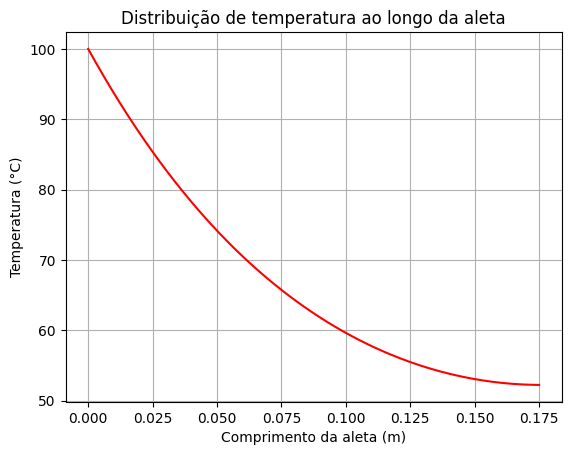

In [43]:
# Temperatura na extremidade da aleta -> (T_L)


def calcula_distribuicao_de_temperaturas(h, P, k, A, L, x):
    """
    Função que calcula a distribuição de temperaturas para transferência de calor por convecção
    """

    m = sqrt((h*P)/(k*A))

    const = h / (m * k)

    numerador = cosh(m * (L - x)) + const * sinh(m * (L - x))
    denominador = cosh(m * L) + const * sinh(m * L)

    distribuicao_de_temperaturas = numerador / denominador

    return distribuicao_de_temperaturas


distribuicao_de_temperaturas = calcula_distribuicao_de_temperaturas(
    h, P, k_Al, A, L, x)

T_L = (distribuicao_de_temperaturas * (Tb - T)) + T

print(f"Temperatura na extremidade da aleta: {T_L} °C")

# Gráfico da distribuição de temperaturas ao longo do comprimento da aleta

lista_distr_temps = []
lista_x_aleta = np.arange(0, L+0.001, 0.001)

for x in lista_x_aleta:
    distr_temp_x = (calcula_distribuicao_de_temperaturas(h, P, k_Al, A, L, x) * (Tb - T)) + T
    lista_distr_temps.append(distr_temp_x)

fig, ax = plt.subplots()
ax.plot(lista_x_aleta, lista_distr_temps, color="red")
ax.set(xlabel='Comprimento da aleta (m)', ylabel='Temperatura (°C)',
       title='Distribuição de temperatura ao longo da aleta')
plt.grid()
plt.show()


## 1.2 Taxa de transferência de calor

In [44]:

def calcula_transferencia_de_calor(h, P, k, A, L, x, T, Tb):
    """
    Função que calcula a distribuição de temperaturas para transferência de calor por convecção
    """
    thetab = Tb - T
    M = sqrt(h*P*k*A) * thetab
    m = sqrt((h*P)/(k*A))

    const = h / (m * k)

    numerador = sinh(m * L) + const * cosh(m * L)
    denominador = cosh(m * L) + const * sinh(m * L)

    taxa_de_transferencia_de_calor = M * (numerador / denominador)

    return taxa_de_transferencia_de_calor

taxa_de_transferencia_de_calor = calcula_transferencia_de_calor(h, P, k_Al, A, L, x, T, Tb)

print(f"Taxa de transferência de calor: {taxa_de_transferencia_de_calor} W")


Taxa de transferência de calor: 7.649007424032011 W


## 1.3 Eficiência da aleta

In [45]:
thetab = Tb - T
eficiencia = taxa_de_transferencia_de_calor/(h * As * thetab)

print(f"Eficiênica da aleta: {eficiencia}")


Eficiênica da aleta: 0.5574265722221259


## 1.4 Efetividade da aleta

In [46]:
efetividade = taxa_de_transferencia_de_calor/(h * Ab * thetab)

print(f"Efetividade: {efetividade}")

Efetividade: 106.23621422266682


## 1.5 Taxa de transferência de calor para aleta infinita

In [47]:
taxa_de_transferencia_de_calor_aleta_infinita = sqrt(h*P*k_Al*A) * thetab

print(f"Taxa de transferência de calor para aleta infinita: {taxa_de_transferencia_de_calor_aleta_infinita} W")


Taxa de transferência de calor para aleta infinita: 8.209263060713795 W


## 1.6 Comparando modelo de aleta finita e aleta infinita

In [48]:

print("Numericamente são diferentes, enquanto a taxa de transferência de calor da aleta adibática é {:.2f}\n a da aleta infinita é {:.2f} \n".format(
    taxa_de_transferencia_de_calor, taxa_de_transferencia_de_calor_aleta_infinita))
print("Isso ocorre pois tanh da expressão da taxa de transferência de calor não tende 1, quando tal fenômeno ocorreria")


Numericamente são diferentes, enquanto a taxa de transferência de calor da aleta adibática é 7.65
 a da aleta infinita é 8.21 

Isso ocorre pois tanh da expressão da taxa de transferência de calor não tende 1, quando tal fenômeno ocorreria


## 1.7 Descobrir o comprimento mínimo para que a hipótese de aleta infinita forneça uma medida precisa para a taxa de transferência de calor

Se $\theta_B = 0$, $T(L) = T_{amb}$ , e portanto, podemos considerar uma condição adiabática na extremidade se $M \approx M \cdot \tanh(m \cdot L)$
e, portanto, $\tanh(m \cdot L) \geq 0.99$


In [51]:
m = sqrt((h*P)/(k_Al*A))

# Resolvendo de forma iterativa
L_minimo = L

while(tanh(m * L_minimo) < 0.99):
    L_minimo += 0.001

print(f"O comprimento mínimo da aleta: {L_minimo:.3f} m")

O comprimento mínimo da aleta: 0.2790000000000001 m


In [54]:
from math import atanh

# Resolvendo de forma analítica

L_minimo = atanh(0.99)/m
print(f"O comprimento mínimo da aleta: {L_minimo} m")

O comprimento mínimo da aleta: 0.2785521267096722 m


# Exercício II - Tá tudo errado daqui pra baixo

a) Considere válida a condição de aleta infinita e desenvolva um modelo matemático que
permita ao usuário do dispositivo determinar a condutividade do material desconhecido. Lembre-se
que 𝑚ଶ = ℎ𝑃/𝑘𝐴௧௥. 


Temos que $m=\sqrt{\frac{h\cdot P}{K_b\cdot A_{tr}}}$.
Considerando a condição de aleta infinita e distribuição de temperaturas (a mesma nas duas), pode-se concluir que:
$$e^{-m\cdot x} = \frac{\theta}{\theta_b}$$
Aplicando $\ln$ em ambos os lados da equação, temos:
$$-m\cdot x = \log{\frac{\theta}{\theta_b}}$$
Substituindo o valor de `m`:
$$-\sqrt{\frac{h\cdot P}{K_b\cdot A_{tr}}}\cdot x = \log{\frac{\theta}{\theta_b}}$$
$$\frac{h\cdot P}{K_b\cdot A_{tr}} = (\frac{\log{\frac{\theta}{\theta_b}}}{x})^2$$
Chegamos então à equação algébrica de $K_b$:
$$K_b = \frac{h\cdot P}{((\frac{\log{\frac{\theta}{\theta_b}}}{x})^2)\cdot A_{tr}}$$


b) Se o material-padrão for o alumínio, com $k_A = 240 \ W/(m^2 \cdot K) $ e as medições
revelarem valores de $T_A = 75^\circ C$ e $T_B = 60^\circ C$ em $x_1$, para $T_b = 100^\circ C$ e $T_{\infty} = 25^\circ C$, qual é a
condutividade térmica 𝜅஻ do material em teste? 

In [50]:
ka = 240        # Condutividade do material em W/m*K
ta = 75         # Temperatura da aleta A em graus Celsius
tb = 60         # Temperatura da aleta B em graus Celsius
tB = 100        # Temperatura da base em graus Celsius
t_amb = 25      # Temperatura do ambiente em graus Celsius

K = ka*(log((ta-t_amb)/(tB-t_amb)))**2
kb = K * 1/(log((tb-t_amb)/(tB-t_amb)))**2

print(f"K = {K}")
print(f"kb = {kb}")


K = 39.45646893435971
kb = 67.92797153154886
